# Non-local means denoising

The principle of this method is to replace a pixel with the mean of similar pixels from the entire image, instead of the local mean around this pixel.

### Parameters of the non-local means denoising function skimage.restoration.denoise_nl_means

**patch_size**: Size of the square patch around the other pixels in the image to compare to the patch around the pixel of interest. Only similar patches will be considered to calculate the mean. The patch size should be roughly related to the pixel size of the object to be denoised. Default value is 5. 

**patch_distance**: Size of the search window. A small value will have a higher computational cost for a better visual quality of result. Default value is 6 (13x13 search area).

**multichannel**: Boolean, *True* if the image is RGB. Default value is *False*.

**sigma**: Noise standard deviation. For Gaussian noise, a default value calculated with the estimate_sigma value. Otherwise it is set to 0.

**h**: Decay of the patch weight function with patch distance. With a big h the decay is fast, and only very similar patches will be taken into account. Here, we chose h close to the noise standard deviation **sigma**.

**fast_mode**: Boolean parameter that chooses the patch weight function. If *False*, a spatial Gaussian weighting is applied to the patches when computing patch distances. If *True*, a faster algorithm employing uniform spatial weighting on the patches is applied. Default value is *False*.


In [1]:
import skimage
from skimage import io
image_cameraman = skimage.io.imread('/work/non-local-mean/data/cameraman/cameraman.tif', 
                               plugin='tifffile')
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.util import random_noise
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def denoise_nlm_params(input_noisy_image, patch_size, patch_distance, multichannel):
    patch_kw = dict(patch_size=patch_size, patch_distance=patch_distance, multichannel=multichannel)
    return patch_kw, np.mean(estimate_sigma(input_noisy_image))

### Gaussian noise example

In [3]:
# Add gaussian noise to the image
image_noisy_gaussian = random_noise(image_cameraman, mode='gaussian')

### Set parameter values

In [4]:
patch_kw, sigma_est = denoise_nlm_params(image_noisy_gaussian, patch_size=5, patch_distance=6, 
                                         multichannel=False)
h = 0.8 * sigma_est
fast_mode = False

### Denoise images

In [5]:
denoised_gaussian_1 = denoise_nl_means(image_noisy_gaussian, h=h, sigma=sigma_est,
                            fast_mode=fast_mode, **patch_kw)

# Change the weight to a faster decay
h = 1.15*sigma_est
denoised_gaussian_2 = denoise_nl_means(image_noisy_gaussian, h=h, sigma=sigma_est,
                            fast_mode=fast_mode, **patch_kw)

### Plot the results and compare

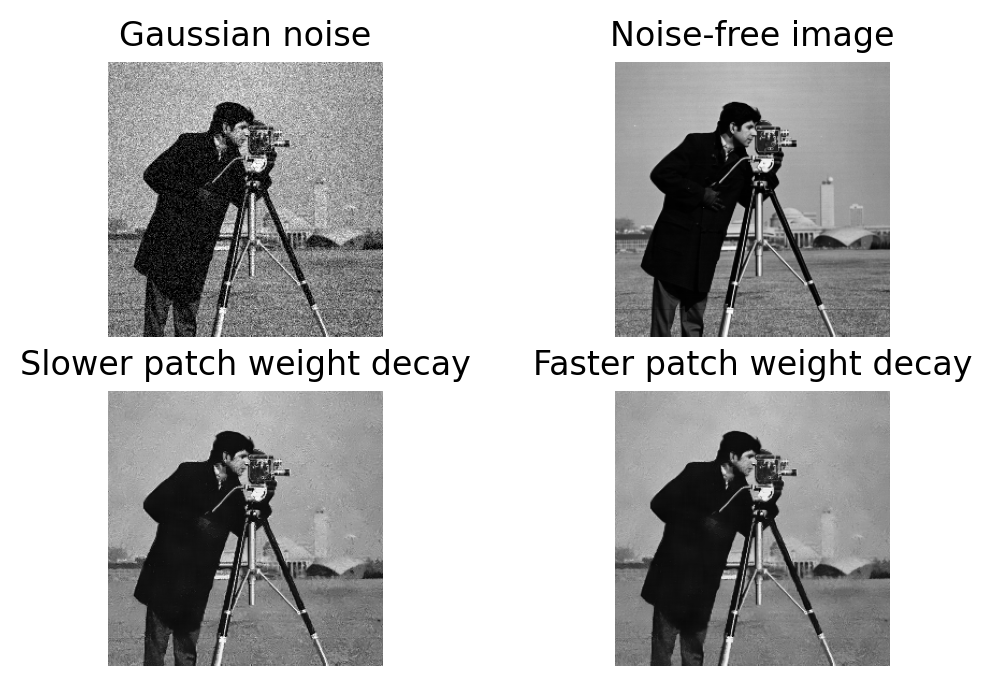

In [6]:
fig = plt.figure(1, dpi=200)

plt.subplot(2,2,1)
plt.imshow(image_noisy_gaussian, cmap='gray')
plt.title('Gaussian noise')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image_cameraman, cmap='gray')
plt.title('Noise-free image')
plt.axis('off')

plt.subplot(2,2,3)

plt.imshow(denoised_gaussian_1, cmap='gray')
plt.title('Slower patch weight decay')
plt.axis('off')

plt.subplot(2,2,4)

plt.imshow(denoised_gaussian_2, cmap='gray')
plt.title('Faster patch weight decay')
plt.axis('off')

plt.show()

### Poisson noise 

In [7]:
# Add poisson noise to the image
image_noisy_poisson = random_noise(image_cameraman, mode='poisson')

### Set parameter values

In [8]:
patch_kw, sigma_est = denoise_nlm_params(image_noisy_poisson, patch_size=5, patch_distance=6, 
                                         multichannel=False)

# sigma_est is used to estimate the weitght decay, but is not a good indicator for the noise variance parameter 
# sigma for poisson noise, so it is set to 0
h = 0.8 * sigma_est
sigma_est_poisson=0

fast_mode = False

### Denoise images

In [9]:
denoised_poisson_1 = denoise_nl_means(image_noisy_poisson, h=h, sigma=sigma_est_poisson, 
                                      fast_mode=fast_mode, **patch_kw)

# Change the weight to a faster decay
h = 1.15 * sigma_est
denoised_poisson_2 = denoise_nl_means(image_noisy_poisson, h=h, sigma=sigma_est_poisson,
                                      fast_mode=fast_mode, **patch_kw)

### Plot the results and compare

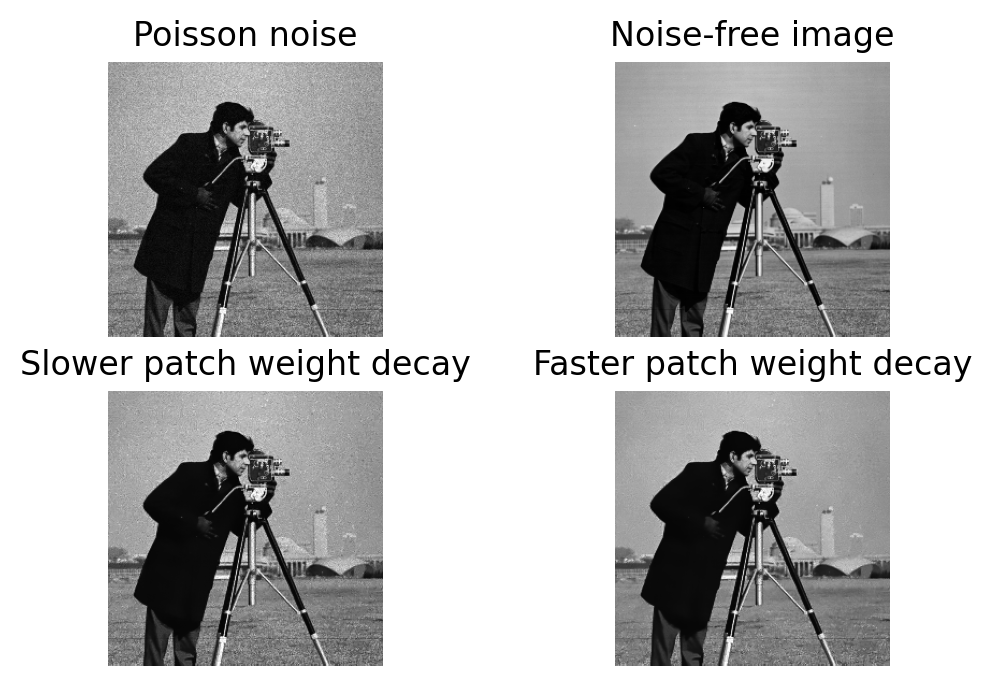

In [10]:
fig = plt.figure(1, dpi=200)

plt.subplot(2,2,1)
plt.imshow(image_noisy_poisson, cmap='gray')
plt.title('Poisson noise')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image_cameraman, cmap='gray')
plt.title('Noise-free image')
plt.axis('off')

plt.subplot(2,2,3)

plt.imshow(denoised_poisson_1, cmap='gray')
plt.title('Slower patch weight decay')
plt.axis('off')

plt.subplot(2,2,4)

plt.imshow(denoised_poisson_2, cmap='gray')
plt.title('Faster patch weight decay')
plt.axis('off')

plt.show()